In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('diabetes_dataset.csv')

# Lihat sekilas data
print(df.info())
print(df.head())

X = df.drop('Pregnancies', axis=1)  # 'target' adalah kolom target (nilai kontinu)
y = df['BloodPressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Regressor Evaluation")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dt)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt)}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_dt)}")

Decision Tree Regressor Evaluation
Mean Squared Error (MSE): 1.2012987012987013
Mean Absolute Error (MAE): 0.16233766233766234
R-squared (R2): 0.9975966348501275


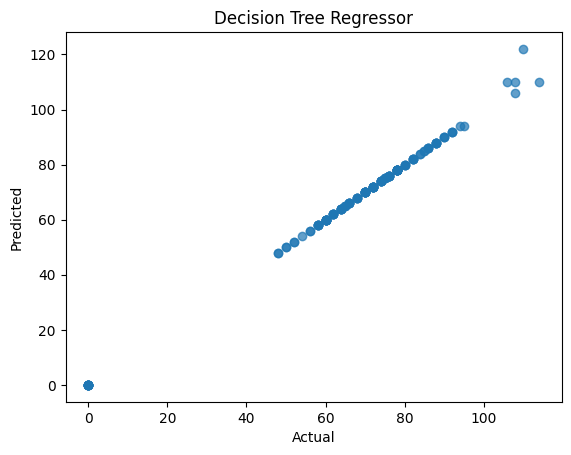

In [4]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor")
plt.show()

In [5]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # Pilih nilai k (tetapkan 5 sebagai default)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [6]:
y_pred_knn = knn_model.predict(X_test)

In [7]:
print("k-NN Regressor Evaluation")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_knn)}")

for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f"K: {k}, MSE: {mean_squared_error(y_test, y_pred):.4f}")

k-NN Regressor Evaluation
Mean Squared Error (MSE): 45.57896103896105
Mean Absolute Error (MAE): 4.879220779220779
R-squared (R2): 0.9088129485114658
K: 1, MSE: 59.1104
K: 2, MSE: 53.1526
K: 3, MSE: 41.0087
K: 4, MSE: 44.6356
K: 5, MSE: 45.5790
K: 6, MSE: 46.0020
K: 7, MSE: 46.6765
K: 8, MSE: 47.1511
K: 9, MSE: 48.1372
K: 10, MSE: 50.9121
K: 11, MSE: 52.8744
K: 12, MSE: 55.3861
K: 13, MSE: 57.2058
K: 14, MSE: 57.9222
K: 15, MSE: 58.3311
K: 16, MSE: 61.0878
K: 17, MSE: 63.1197
K: 18, MSE: 65.4303
K: 19, MSE: 66.9143
K: 20, MSE: 67.5167
